## Final Project Submission

Please fill out:
* Student name: Christopher Miley 
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Mark Barbour
* Blog post URL: https://www.blogger.com/blog/post/edit/1224276646261516200/1789492233906042393


# Movie Studio Production Analysis

## Overview 

This project analyzes multiple datasets regarding movie information, key figures associated with those movies, and total budget and financial returns. The analysis undertaken shows the various factors that play a role in movie success measured by profit, including particular genres, directors, and principal actors. A business can use this data to take the best approach for producing the most profitable movies.

## Business Problem

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## Data Understanding

There were two datasets in particular that were used for this analysis. One dataset, called 'tn.movie_budgets.csv', contains a sample of over five thousand movies and their respective production budget, domestic gross, and worldwide gross. The other dataset, called 'im.db', is a SQL database containing a large dataset from IMDB, a database about movies. The key tables used contained information about a movie's name, genre, and release date, as well as principal actors and directors associated with that movie.   

### Import Libraries 

First thing we did was to import the necessary libraries from SQL, Pandas, Matplotlib, Seaborn, Numpy, and Statsmodels. 

In [1]:
#import dataset libraries
import sqlite3
import pandas as pd

#import libraries for graphing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn-whitegrid')
%matplotlib inline

#import library for adjusting format of graphing ticks
import matplotlib.ticker as ticker

#import statsmodels library for model testing
import statsmodels.api as sm

#import linear test to check for non-linearity
from statsmodels.stats.diagnostic import linear_rainbow

### Load Dataset

We then loaded the 'tn.movie_budgets.csv' dataset into a dataframe called budget_df.

In [2]:
#load budget dataset
budget_df = pd.read_csv('movie_data/tn.movie_budgets.csv', index_col=0)

### Inspect the Dataset 

We then proceeded to inspect various aspects of the dataset including value types, size, missing values, and duplicates. 

In [3]:
#inspect dataset
budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
#inspect value types
budget_df.dtypes

release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [5]:
#inspect size
budget_df.shape

(5782, 5)

In [6]:
#inspect for missing values
budget_df.describe()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,24,3,231,548,367


In [7]:
#check for duplicate records
duplicates = budget_df.duplicated()
for row in duplicates:
    if not True:
        print(row)

### Add a Net Profit Column

We added a column that subtracted 'production_budget' from 'worldwide_gross' and named it 'total_profit', as well as adjusting the format to display values in U.S. currency.

In [8]:
#add a column to the dataset called 'total_profit'
budget_df['total_profit'] = budget_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int) - budget_df['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)

In [9]:
#change the format of 'total_profit' to reflect currency
budget_df['total_profit'] = budget_df['total_profit'].apply(lambda x: '${:,.0f}'.format(x))

In [10]:
#inspect edited dataset
budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
id,,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","$2,351,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","$635,063,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","$-200,237,650"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","$1,072,413,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747","$999,721,747"


### Calculations and Visualization

We created a copy of the dataset for analysis and visualization.

In [11]:
#make a copy of the dataset for visualization analysis
budget_graph_df = budget_df.copy()

### Manipulated Column Values and Added a Year Column

We converted the values of financial columns to numeric values to make for easier manipulation, as well as converting the 'release_date' column to datetime values in order to add a column called 'release_year' that extracts just the year portion.

In [12]:
#convert financial columns to numeric values
for column in ['production_budget', 'domestic_gross', 'worldwide_gross', 'total_profit']:
    budget_graph_df[column] = budget_graph_df[column].str.replace('$', '').str.replace(',', '').astype(int)

In [13]:
#convert 'release_date' column to datetime values
budget_graph_df['release_date'] = pd.to_datetime(budget_graph_df['release_date'])

#add another column that just reflects the release year called 'release_year' as a numeric value
budget_graph_df['release_year'] = budget_graph_df['release_date'].dt.year.astype(int)

## Analysis

### Create a Scatter Plot 

We created a scatter plot to look for a linear relationship between 'release_year' and 'production_budget'. The relationship appeared more exponential than linear.

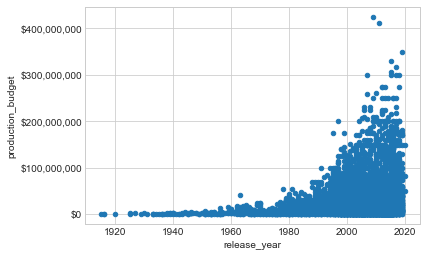

In [14]:
# Create a scatter plot to look for a linear relationship between release_year and production_budget
ax = budget_graph_df.plot.scatter(x='release_year', y='production_budget')

# Customize the y-axis tick labels
currency_formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))
ax.yaxis.set_major_formatter(currency_formatter)

# Display the plot
plt.show()

### Customize Data & Scatter Plot to Display Movies from 1980 to Present Day

We filtered out the dataset to limit movies from 1980 to the present day, as that seemed more closely relevant to our analysis. The relationship still didn't seem quite linear.

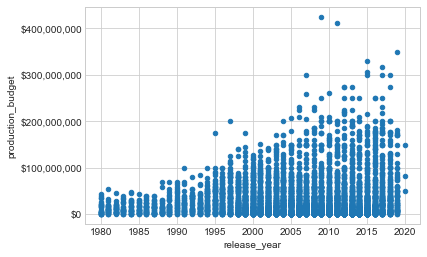

In [15]:
#filter to release years from 1980 to present day to inspect for a linear relationship to production_budget
year_filtered_budget_df = budget_graph_df[(budget_graph_df['release_year'] >= 1980)]

# Create a scatter plot to look for a linear relationship between release_year and production_budget
ax = year_filtered_budget_df.plot.scatter(x='release_year', y='production_budget')

# Customize the y-axis tick labels
ax.yaxis.set_major_formatter(currency_formatter)

# Display the plot
plt.show()

### Correlation Coefficient

We calculated the correlation coefficient between 'release_year' and 'production_budget' as another means of looking for a relationship. The result suggested little to no correlation.

In [16]:
#calculate the correlation coefficient 
year_budget_correlation_coefficient = year_filtered_budget_df['release_year'].corr(year_filtered_budget_df['production_budget'])
print(year_budget_correlation_coefficient)

0.11741441973710044


### Create Scatter Plot With New Target Variable Total Profit

After this, we decided to use 'total_profit' as the target variable to test all other sensible columns against. We graphed a scatter plot and linear regression line for each. While there seems to clearly be a linear relationship between 'worldwide_gross' and 'total_profit', as well as some linearity between 'domestic_gross' and 'total_profit' (both to be expected), there was surprisingly little to no linearity for 'total_profit' against 'production_budget' or 'release_year'. 

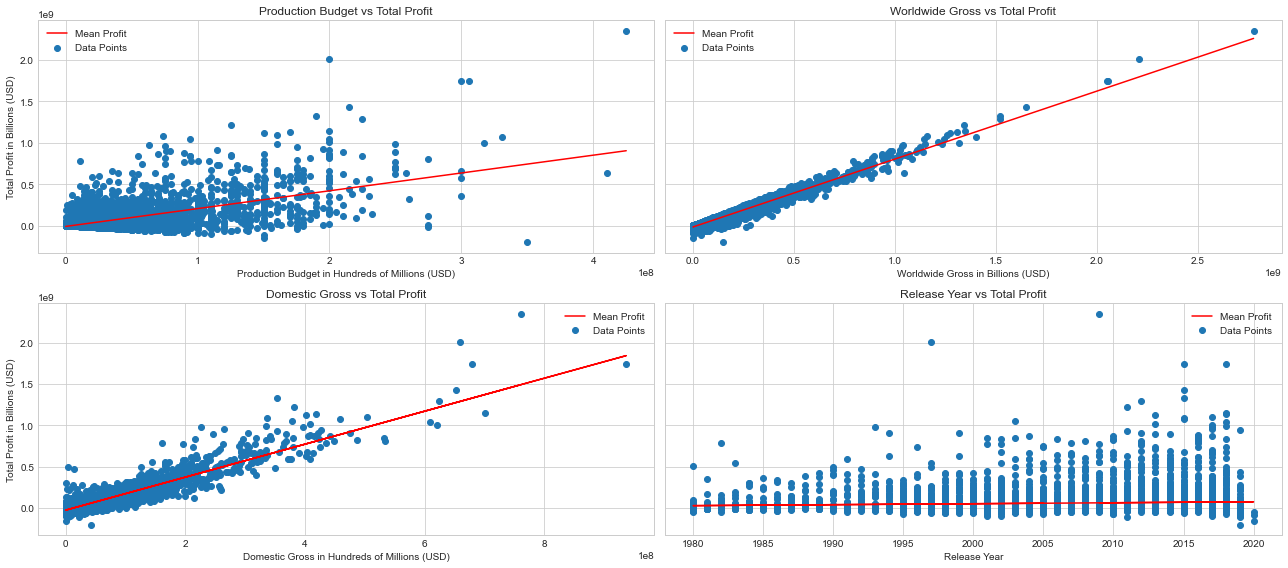

In [17]:
# Set up plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 8), sharey=True)

# Define the numeric columns
numeric_columns = ['production_budget', 'worldwide_gross', 'domestic_gross', 'release_year']

# Iterate through each variable to plot against 'total_profit'
for index, column in enumerate(numeric_columns):
    row = index // 2  # Calculate the row index
    col = index % 2  # Calculate the column index
    ax = axes[row, col]

    # Scatter plot of data
    ax.scatter(year_filtered_budget_df[column], year_filtered_budget_df['total_profit'], label='Data Points')

    # Set x-axis and y-axis labels
    if column == 'production_budget':
        ax.set_xlabel("Production Budget in Hundreds of Millions (USD)")
        ax.set_title("Production Budget vs Total Profit")
    elif column == 'worldwide_gross':
        ax.set_xlabel("Worldwide Gross in Billions (USD)")
        ax.set_title("Worldwide Gross vs Total Profit")
    elif column == 'domestic_gross':
        ax.set_xlabel("Domestic Gross in Hundreds of Millions (USD)")
        ax.set_title("Domestic Gross vs Total Profit")
    else:
        ax.set_xlabel("Release Year")
        ax.set_title("Release Year vs Total Profit")
    axes[0, 0].set_ylabel("Total Profit in Billions (USD)")
    axes[1, 0].set_ylabel("Total Profit in Billions (USD)")

    # Calculate linear regression line
    x = year_filtered_budget_df[column]
    y = year_filtered_budget_df['total_profit']
    slope, intercept = np.polyfit(x, y, deg=1)
    regression_line = slope * x + intercept

    # Plot linear regression line
    ax.plot(x, regression_line, color='red', label='Mean Profit')

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

# Adjust layout and show graphs
plt.tight_layout()
plt.show()

### Correlation Matrix

We ran a correlation coefficient for all previously graphed columns against 'production_budget', which produced the results similar to the graphs, though seemed to indicate a little more correlation for 'production_budget' than the graph displayed.

In [18]:
#set up a correlation matrix
correlation_matrix = year_filtered_budget_df.select_dtypes(include='number').corr()

#print out the correlation coefficients for each variable
print(correlation_matrix['total_profit'])

production_budget    0.614824
domestic_gross       0.926814
worldwide_gross      0.982121
total_profit         1.000000
release_year         0.066601
Name: total_profit, dtype: float64


### Set a Model for Testing

Tested a model of 'worldwide_gross' against 'total_profit'. Results indicated approximately 96.5% explained variance, were statistically significant overall, as well as our coefficients, and suggested that each dollar accrued in Worldwide Gross results in a gain of $0.82 in Total Profit.

In [19]:
#set the variables for the model
X = year_filtered_budget_df[["worldwide_gross"]]
y = year_filtered_budget_df["total_profit"]

In [20]:
#set the model
model = sm.OLS(endog=y, exog=sm.add_constant(X))

#set and print the results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_profit   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 1.499e+05
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:52:47   Log-Likelihood:            -1.0231e+05
No. Observations:                5511   AIC:                         2.046e+05
Df Residuals:                    5509   BIC:                         2.046e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.601e+07   4.26e+05    -

### Modified Model

Added in 'domestic_gross' to see if it made a significant difference to our model. It did not. We wound up with very similar results for our R-squared and P values, with an indication that each dollar accrued in domestic gross results in a gain of approximately $0.06. 

In [21]:
#add domestic_gross to see if it improves the model and run the new model
X_gross = year_filtered_budget_df[["worldwide_gross", "domestic_gross"]]
model_gross = sm.OLS(endog=y, exog=sm.add_constant(X_gross))
results_gross = model_gross.fit()
print(results_gross.summary())

                            OLS Regression Results                            
Dep. Variable:           total_profit   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 7.518e+04
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:52:47   Log-Likelihood:            -1.0230e+05
No. Observations:                5511   AIC:                         2.046e+05
Df Residuals:                    5508   BIC:                         2.046e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.652e+07   4.44e+05    -

### Regression Plots of Worldwide Gross vs Total Profit

Plotted several regression graphs to show how close our original model is to the mean, as well as the relationship to the residuals. We also calculated our confidence interval to be between about 81 and 82 cents for the 'worldwide_gross' coefficient.

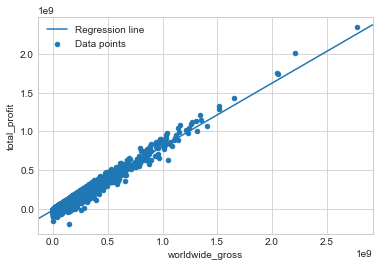

In [22]:
#plot the data alongisde a regression line
fig, ax = plt.subplots()
year_filtered_budget_df.plot.scatter(x="worldwide_gross", y="total_profit", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line", ax=ax)
ax.legend();

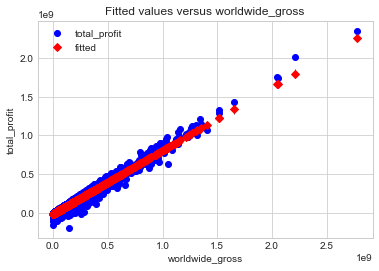

In [23]:
#plot a fitted graph
sm.graphics.plot_fit(results, "worldwide_gross")
plt.show()

In [24]:
#look at the confidence interval
print(results.conf_int())

                            0             1
const           -1.684328e+07 -1.517490e+07
worldwide_gross  8.162781e-01  8.245852e-01


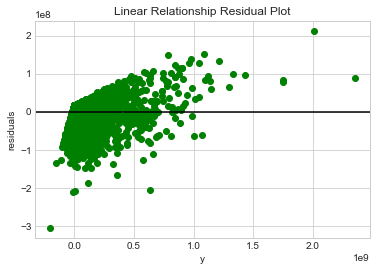

In [25]:
#plot a graph of the residuals
linear_model = sm.OLS(y, sm.add_constant(X))
linear_results = linear_model.fit()

fig, ax = plt.subplots()

ax.scatter(y, linear_results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");

### Non-linearity

We used linear_rainbow to test for non-linearity. The results suggested we would reject our null hypothesis, which is that the model is a truly linear relationship. The same was true for the revised model. This suggests there may be more factors that need to be inspected (i.e. inflation, changes in consumption).

In [26]:
#test worldwide_gross vs total_profit for non-linearity
linear_rainbow(linear_results)

(15.573281021250821, 0.0)

In [27]:
#test the combined gross for non-linearity
linear_rainbow(results_gross)

(15.552993824873507, 0.0)

### Sorted and Extracted Values

We sorted the dataframe by highest total profit, then extracted the twenty highest profitable movies to graph.

In [28]:
#sort values by highest profit
budget_graph_df.sort_values('total_profit', inplace=True, ascending=False)

In [29]:
#check the edited dataframe
budget_graph_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year
id,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,2009
43,1997-12-19,Titanic,200000000,659363944,2208208395,2008208395,1997
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,2015


In [30]:
#pull the 20 highest profitable movies
top_twenty_profit_df = budget_graph_df.head(20)

In [31]:
#check the new dataframe
top_twenty_profit_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year
id,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,2009
43,1997-12-19,Titanic,200000000,659363944,2208208395,2008208395,1997
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,2015
67,2015-04-03,Furious 7,190000000,353007020,1518722794,1328722794,2015
27,2012-05-04,The Avengers,225000000,623279547,1517935897,1292935897,2012
61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011
42,2018-02-16,Black Panther,200000000,700059566,1348258224,1148258224,2018


### Bar Graph of Top Movies by Profit

We graphed the top 20 movies by total profit.

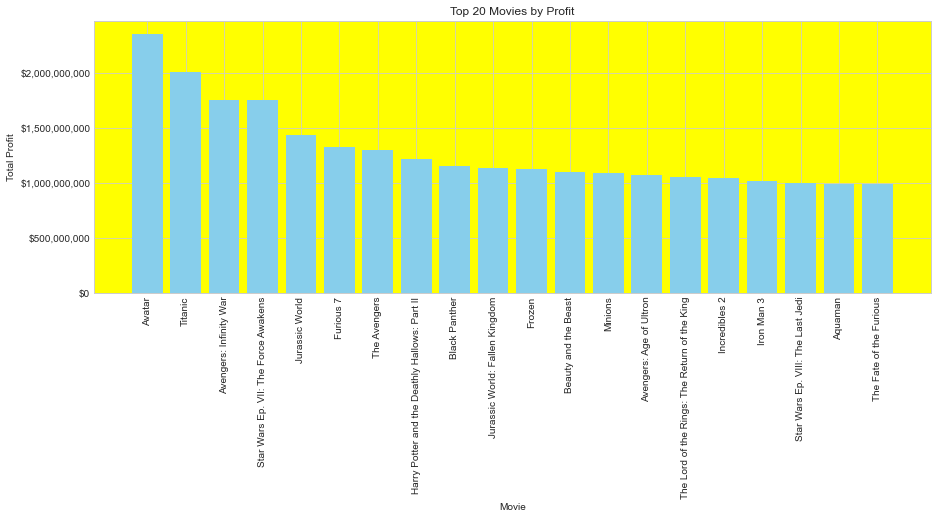

In [32]:
#plot bar graph of twenty most profitable movies
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(top_twenty_profit_df['movie'], top_twenty_profit_df['total_profit'], color='skyblue')

# Add labels and title
ax.set_xlabel('Movie')
ax.set_ylabel('Total Profit')
ax.set_title('Top 20 Movies by Profit')
ax.set_facecolor('yellow')


# Format y-axis ticks with "$" symbol
ax.yaxis.set_major_formatter(currency_formatter)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the graph
plt.show()

## SQL Database Understanding

### Load Movie Database

We loaded 'im.db' through a SQL query.

In [33]:
#load movie database
db_file = 'movie_data/im.db'
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

### Inspect Tables

We looked at various tables in the database to understand the columns and relationship between tables.

In [34]:
#inspect the persons table
pd.read_sql("""
            SELECT *
            FROM persons
            WHERE primary_name = 'Meryl Streep'
            LIMIT 5;
""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0000658,Meryl Streep,1949.0,None,"actress,soundtrack,producer"


In [35]:
#inspect the movie_basics table
pd.read_sql("""
            SELECT *
            FROM movie_basics
            LIMIT 5;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [36]:
#inspect the principals table
pd.read_sql("""
            SELECT *
            FROM principals
            JOIN persons
                USING(person_id)
            WHERE primary_name = 'Anthony Russo'
            LIMIT 15;
""", conn)

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession
0,tt1843866,5,nm0751577,director,None,None,Anthony Russo,1970.0,None,"producer,director,writer"
1,tt3498820,5,nm0751577,director,None,None,Anthony Russo,1970.0,None,"producer,director,writer"
2,tt4154756,5,nm0751577,director,None,None,Anthony Russo,1970.0,None,"producer,director,writer"
3,tt4154796,5,nm0751577,director,None,None,Anthony Russo,1970.0,None,"producer,director,writer"
4,tt8688634,9,nm0751577,producer,producer,None,Anthony Russo,1970.0,None,"producer,director,writer"
5,tt8936646,9,nm0751577,producer,producer,None,Anthony Russo,1970.0,None,"producer,director,writer"
6,tt9130508,2,nm0751577,director,None,None,Anthony Russo,1970.0,None,"producer,director,writer"
7,tt9252468,7,nm0751577,producer,producer,None,Anthony Russo,1970.0,None,"producer,director,writer"
8,tt5557700,2,nm8003276,self,None,"[""Himself""]",Anthony Russo,NaN,None,producer


### Merge Columns from Relevant Tables 

We wrote a SQL query to join relevant columns from relevant tables (movie names, people's names, genres, role as director or principal actor) and set it to a pandas dataframe called filtered_movie_df. We then edited that dataframe.

In [37]:
#create a dataframe extracting movies, their genre, director, and principal actors
query = '''
SELECT m.primary_title AS movie_name, m.genres, m.start_year AS year, p.primary_name AS person_name,
    CASE
        WHEN pr.category = 'actor' OR pr.category = 'actress' THEN 'Principal Actor'
        WHEN pr.category = 'director' THEN 'Director'
    END AS role
FROM movie_basics AS m
LEFT JOIN principals AS pr ON m.movie_id = pr.movie_id AND pr.person_id = pr.person_id
LEFT JOIN persons AS p ON pr.person_id = p.person_id;
'''
filtered_movie_df = pd.read_sql_query(query, conn)

In [38]:
#drop duplicate rows
filtered_movie_df.drop_duplicates(inplace=True)

In [39]:
#clean dataframe removing punctuation
filtered_movie_df['person_name'] = filtered_movie_df['person_name'].str.replace("""'""", '')

In [40]:
#drop missing values
filtered_movie_df = filtered_movie_df.dropna()

In [41]:
#keep only names that are in the alphabet or number system
filtered_movie_df = filtered_movie_df[filtered_movie_df['person_name'].str.match(r'^[a-zA-Z0-9]')]

In [42]:
#capitalize names
filtered_movie_df['person_name'] = filtered_movie_df['person_name'].str.title()

In [43]:
#sort names alphabetically
filtered_movie_df.sort_values('person_name', ascending=True, inplace=True)

In [44]:
#inspect edited dataframe
filtered_movie_df

,movie_name,genres,year,person_name,role
681505,King of the Ville,Drama,2011,10Gzy,Principal Actor
951134,Aatagallu,Thriller,2018,143 Anand,Principal Actor
45216,Beneath the Surface,Documentary,2015,1996 Olympic Water Polo Team,Principal Actor
45217,Beneath the Surface,Documentary,2015,2004 Olympic Water Polo Team,Principal Actor
45215,Beneath the Surface,Documentary,2015,2008 Olympic Water Polo Team,Principal Actor
...,...,...,...,...,...
661662,Ikizler firarda,"Comedy,Drama",2012,Zülfü Hamit Altin,Principal Actor
841995,Nefrin,Horror,2017,Zülfü Hamit Altin,Principal Actor
73128,Veda - Atatürk,"Biography,Drama,History",2010,Zülfü Livaneli,Director
263175,300 Worte Deutsch,"Comedy,Drama",2013,Züli Aladag,Director


In [45]:
#check example rows
filtered_movie_df[filtered_movie_df["person_name"] == "Scarlett Johansson"]

,movie_name,genres,year,person_name,role
3303,The Avengers,"Action,Adventure,Sci-Fi",2012,Scarlett Johansson,Principal Actor
36786,Ghost in the Shell,"Action,Drama,Sci-Fi",2017,Scarlett Johansson,Principal Actor
136531,Her,"Drama,Romance,Sci-Fi",2013,Scarlett Johansson,Principal Actor
247603,Don Jon,"Comedy,Drama,Romance",2013,Scarlett Johansson,Principal Actor
658694,American Express Unstaged: Ellie Goulding,Music,2015,Scarlett Johansson,Director
52601,Under the Skin,"Drama,Horror,Sci-Fi",2013,Scarlett Johansson,Principal Actor
452680,Captain America: Civil War,"Action,Adventure,Sci-Fi",2016,Scarlett Johansson,Principal Actor
48197,We Bought a Zoo,"Comedy,Drama,Family",2011,Scarlett Johansson,Principal Actor
800753,Sing 2,"Animation,Comedy,Family",2021,Scarlett Johansson,Principal Actor
4832,Hitchcock,"Biography,Comedy,Drama",2012,Scarlett Johansson,Principal Actor


In [46]:
#reset the index
filtered_movie_df.reset_index(drop=True, inplace=True)
filtered_movie_df

,movie_name,genres,year,person_name,role
0,King of the Ville,Drama,2011,10Gzy,Principal Actor
1,Aatagallu,Thriller,2018,143 Anand,Principal Actor
2,Beneath the Surface,Documentary,2015,1996 Olympic Water Polo Team,Principal Actor
3,Beneath the Surface,Documentary,2015,2004 Olympic Water Polo Team,Principal Actor
4,Beneath the Surface,Documentary,2015,2008 Olympic Water Polo Team,Principal Actor
...,...,...,...,...,...
532866,Ikizler firarda,"Comedy,Drama",2012,Zülfü Hamit Altin,Principal Actor
532867,Nefrin,Horror,2017,Zülfü Hamit Altin,Principal Actor
532868,Veda - Atatürk,"Biography,Drama,History",2010,Zülfü Livaneli,Director
532869,300 Worte Deutsch,"Comedy,Drama",2013,Züli Aladag,Director


In [47]:
#check another example
filtered_movie_df[(filtered_movie_df["person_name"] == "Martin Scorsese")]

,movie_name,genres,year,person_name,role
322810,The Wolf of Wall Street,"Biography,Crime,Drama",2013,Martin Scorsese,Director
322811,Rolling Thunder Revue: A Bob Dylan Story by Ma...,Documentary,2019,Martin Scorsese,Director
322812,George Harrison: Living in the Material World,"Biography,Documentary,Music",2011,Martin Scorsese,Director
322813,Public Speaking,Documentary,2010,Martin Scorsese,Director
322814,Hugo,"Adventure,Drama,Family",2011,Martin Scorsese,Director
322815,Shutter Island,"Mystery,Thriller",2010,Martin Scorsese,Director
322816,The Irishman,"Biography,Crime,Drama",2019,Martin Scorsese,Director
322817,The 50 Year Argument,Documentary,2014,Martin Scorsese,Director
322818,Silence,"Adventure,Drama,History",2016,Martin Scorsese,Director


### Hundred Most Profitable

We extracted the one hundred most profitable movies from the original dataframe (budget_graph_df) and then merged it with our new dataframe from the SQL database query (filtered_movie_df), along the condition of being the same movie. We named this dataframe merged_profit_df.  

In [48]:
#take the 100 most profitable movies
hundred_profit_df = budget_graph_df.head(100)

In [49]:
#merge the cast/director/genre dataframe with the 100 most profitable movies dataframe
merged_profit_df = hundred_profit_df.merge(filtered_movie_df, left_on=['movie', 'release_year'], right_on=['movie_name', 'year'])

### Organized by Role

With merged_profit_df, we now have a clear picture of the directors and principal actors of the most profitable movies. Unfortunately, the original 'im.db' does not account for all 100 movies from the movie_budgets CSV, but it does account for over 50 of them, so we felt this was effective enough for our analysis.

In [50]:
#inspect new dataframe
merged_profit_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,movie_name,genres,year,person_name,role
0,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2018,Anthony Russo,Director
1,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2018,Chris Evans,Principal Actor
2,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2018,Chris Hemsworth,Principal Actor
3,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2018,Joe Russo,Director
4,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2018,Mark Ruffalo,Principal Actor
...,...,...,...,...,...,...,...,...,...,...,...,...
297,2010-05-21,Shrek Forever After,165000000,238736787,756244673,591244673,2010,Shrek Forever After,"Adventure,Animation,Comedy",2010,Antonio Banderas,Principal Actor
298,2010-05-21,Shrek Forever After,165000000,238736787,756244673,591244673,2010,Shrek Forever After,"Adventure,Animation,Comedy",2010,Cameron Diaz,Principal Actor
299,2010-05-21,Shrek Forever After,165000000,238736787,756244673,591244673,2010,Shrek Forever After,"Adventure,Animation,Comedy",2010,Eddie Murphy,Principal Actor
300,2010-05-21,Shrek Forever After,165000000,238736787,756244673,591244673,2010,Shrek Forever After,"Adventure,Animation,Comedy",2010,Mike Mitchell,Director


In [51]:
#print the number of different movies in the newly merged dataframe
unique_movies = merged_profit_df['movie'].unique()
num_unique_movies = len(unique_movies)
print(f"Number of different movie names: {num_unique_movies}\n")

#print info on the different movies
counter = 0
for movie in unique_movies:
    movie_rows = merged_profit_df[merged_profit_df['movie'] == movie]
    print(movie)


Number of different movie names: 55

Avengers: Infinity War
Jurassic World
Furious 7
The Avengers
Black Panther
Jurassic World: Fallen Kingdom
Frozen
Beauty and the Beast
Minions
Avengers: Age of Ultron
Incredibles 2
Iron Man 3
Aquaman
The Fate of the Furious
Despicable Me 3
Captain Marvel
Transformers: Dark of the Moon
Skyfall
Despicable Me 2
Transformers: Age of Extinction
Captain America: Civil War
Jumanji: Welcome to the Jungle
Zootopia
Toy Story 3
Rogue One: A Star Wars Story
Bohemian Rhapsody
Alice in Wonderland
Finding Dory
The Secret Life of Pets
The Dark Knight Rises
The Jungle Book
Ice Age: Continental Drift
The Hobbit: An Unexpected Journey
Deadpool
Venom
The Hunger Games: Catching Fire
The Hobbit: The Desolation of Smaug
Spider-Man: Homecoming
The Hobbit: The Battle of the Five Armies
Inside Out
Deadpool 2
Inception
Wonder Woman
Thor: Ragnarok
It
The Hunger Games: Mockingjay - Part 1
The Twilight Saga: Eclipse
Pirates of the Caribbean: On Stranger Tides
Coco
Fantastic Beast

## Analysis

### Bar Graph of Most Frequent Names to Appear

We visualized a bar graph of the 20 most frequent names to appear in the most profitable movies dataframe. We then visualized bar graphs that separated them by principal actor and director.

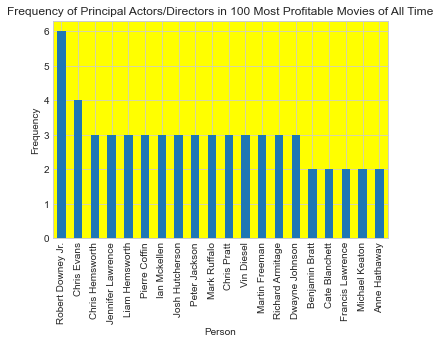

In [52]:
# Get the frequency of each primary_name
name_counts = merged_profit_df['person_name'].value_counts()

# Create the bar plot
name_counts.head(20).plot(kind='bar')

# Add labels, title, and background color
plt.xlabel('Person')
plt.ylabel('Frequency')
plt.title('Frequency of Principal Actors/Directors in 100 Most Profitable Movies of All Time')
plt.gca().set_facecolor('yellow')

# Display the graph
plt.show()

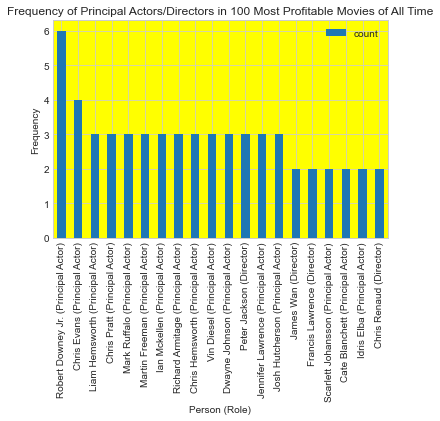

In [53]:
# Get the frequency of each primary_name and associated role
name_role_counts = merged_profit_df.groupby(['person_name', 'role']).size().reset_index(name='count')

# Create a new column with names and roles
name_role_counts['name_with_role'] = name_role_counts['person_name'] + ' (' + name_role_counts['role'] + ')'

# Sort the dataframe by count in descending order
name_role_counts = name_role_counts.sort_values(by='count', ascending=False)

# Create the bar plot
name_role_counts.head(20).plot(x='name_with_role', y='count', kind='bar')

# Add labels, title, and background color
plt.xlabel('Person (Role)')
plt.ylabel('Frequency')
plt.title('Frequency of Principal Actors/Directors in 100 Most Profitable Movies of All Time')
plt.gca().set_facecolor('yellow')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the graph
plt.show()

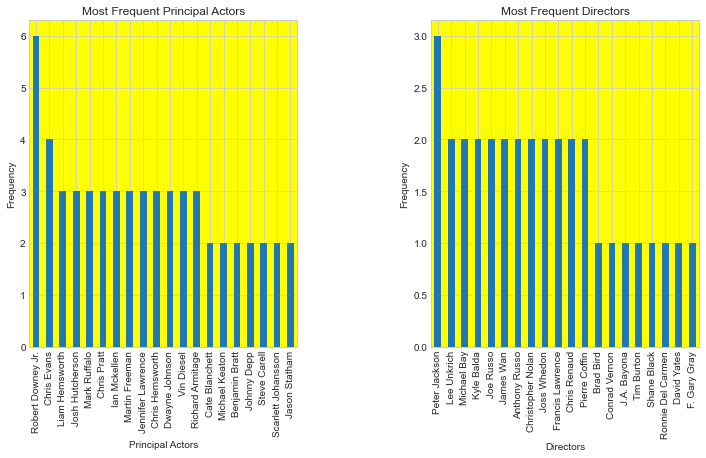

In [54]:
# Filter the dataframe for principal actors and directors
actors = merged_profit_df[merged_profit_df['role'].str.contains('actor', case=False)]
directors = merged_profit_df[merged_profit_df['role'].str.contains('director', case=False)]

# Get the top 20 frequency of each principal actor
actor_counts = actors['person_name'].value_counts().head(20)

# Get the top 20 frequency of each director
director_counts = directors['person_name'].value_counts().head(20)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create the bar plot for principal actors
actor_counts.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Principal Actors')
ax1.set_ylabel('Frequency')
ax1.set_title('Most Frequent Principal Actors')
ax1.set_facecolor('yellow')

# Create the bar plot for directors
director_counts.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Directors')
ax2.set_ylabel('Frequency')
ax2.set_title('Most Frequent Directors')
ax2.set_facecolor('yellow')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Display the figure
plt.show()

### Bar Graph of Top 5 by Mean Total Profit

We then visualized a bar graph for the top 5 most frequent principal actors and directors and measured the mean total profit of their movies. 

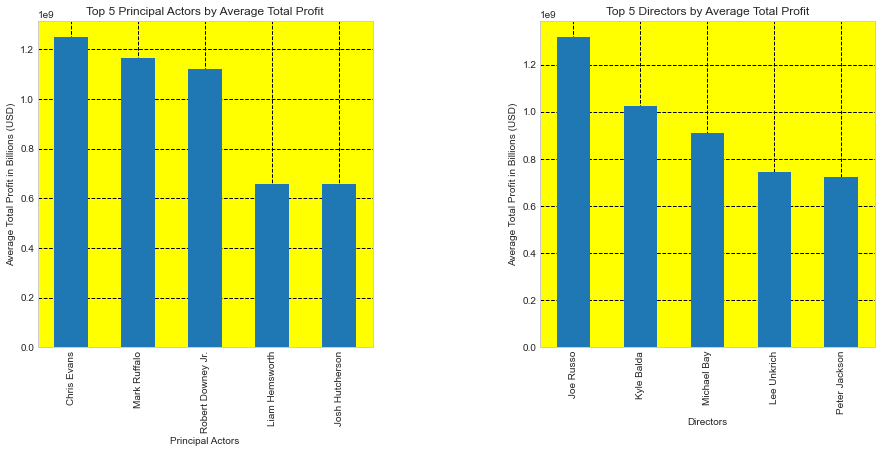

In [55]:
# Get the top 5 most frequent principal actors
top_5_actors = actor_counts.nlargest(5).index

# Get the top 5 most frequent directors
top_5_directors = director_counts.nlargest(5).index

# Filter the merged_profit_df based on the top 5 actors and directors
filtered_actor_profit_df = merged_profit_df[merged_profit_df['person_name'].isin(top_5_actors)]
filtered_director_profit_df = merged_profit_df[merged_profit_df['person_name'].isin(top_5_directors)]

# Group the filtered dataframes by primary_name and calculate the average total_profit
grouped_actor_df = filtered_actor_profit_df.groupby('person_name')['total_profit'].mean().sort_values(ascending=False)
grouped_director_df = filtered_director_profit_df.groupby('person_name')['total_profit'].mean().sort_values(ascending=False)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Create the bar plot for top principal actors
grouped_actor_df.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Principal Actors')
ax1.set_ylabel('Average Total Profit in Billions (USD)')
ax1.set_title('Top 5 Principal Actors by Average Total Profit')
ax1.set_facecolor('yellow')

# Create the bar plot for top directors
grouped_director_df.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Directors')
ax2.set_ylabel('Average Total Profit in Billions (USD)')
ax2.set_title('Top 5 Directors by Average Total Profit')
ax2.set_facecolor('yellow')


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

#Darken the gridlines
ax1.grid(True, linewidth=1, linestyle='--', color='black')
ax2.grid(True, linewidth=1, linestyle='--', color='black')

# Display the figure
plt.show()

### Bar Graph of Genres by Mean Total Profit

We then similarly visualized a graph of mean total profit, but now grouped by genre, in descending order, with the top 5 results.

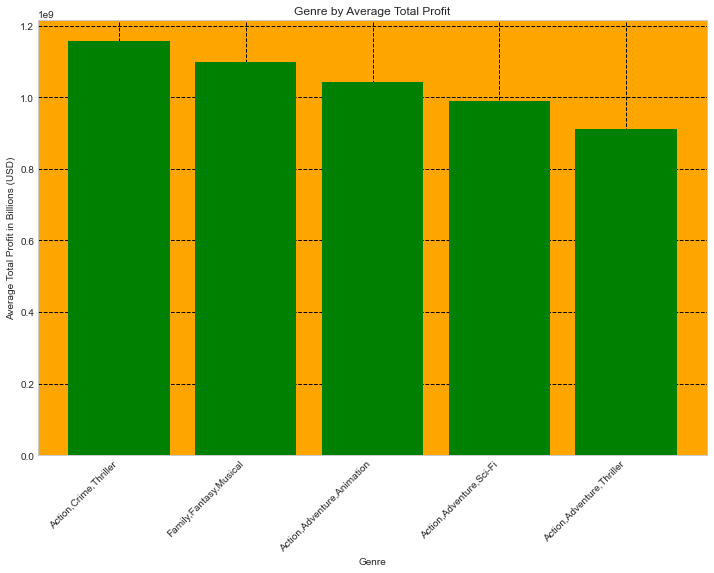

In [56]:
# Group the merged dataset by genre and calculate the average total profit for each genre
grouped_genre_df = merged_profit_df.groupby('genres')['total_profit'].mean().reset_index()

# Sort the dataframe by average total profit in descending order and take the top 5
grouped_genre_df = grouped_genre_df.sort_values(by='total_profit', ascending=False)
top_5_genre_df = grouped_genre_df.head(5)

# Create a bar graph
plt.figure(figsize=(12, 8))
plt.bar(top_5_genre_df['genres'], top_5_genre_df['total_profit'], color='green')

# Customize the graph
plt.xlabel('Genre')
plt.ylabel('Average Total Profit in Billions (USD)')
plt.title('Genre by Average Total Profit')
plt.xticks(rotation=45, ha='right')
plt.gca().set_facecolor('orange')
plt.grid(True, linewidth=1, linestyle='--', color='black')

# Show the graph
plt.show()

##### Measure Each Movie's Number of Matches

We created another dataframe called merged_profit_linear_df, which added a column that reflects the number of people (principal actors and directors) that are associated with that movie and are from our top 5 lists to measure the relationship with total profit. 

In [57]:
# Create a copy of merged_profit_df
merged_profit_linear_df = merged_profit_df.copy()

# Initialize the genre_director_actor_count column
merged_profit_linear_df['director_actor_count'] = 0

# Iterate over each movie
for movie in merged_profit_linear_df['movie'].unique():
    # Filter the rows for the current movie
    movie_rows = merged_profit_linear_df[merged_profit_linear_df['movie'] == movie]

    # Count the number of entries from top_5_actors and top_5_directors in the movie rows
    count = movie_rows[movie_rows['person_name'].isin(top_5_actors)].shape[0]
    count += movie_rows[movie_rows['person_name'].isin(top_5_directors)].shape[0]

    # Update the genre_director_actor_count column for the movie
    merged_profit_linear_df.loc[merged_profit_linear_df['movie'] == movie, 'director_actor_count'] = count

# Keep only one row per movie
merged_profit_linear_df = merged_profit_linear_df.drop_duplicates(subset='movie')

#Drop unnecessary columns
merged_profit_linear_df = merged_profit_linear_df.drop(["person_name", "role"], axis=1)

# Reset the index
merged_profit_linear_df = merged_profit_linear_df.reset_index(drop=True)

# Display the updated DataFrame
merged_profit_linear_df.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,movie_name,genres,year,director_actor_count
0,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2018,4
1,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,2015,Jurassic World,"Action,Adventure,Sci-Fi",2015,0
2,2015-04-03,Furious 7,190000000,353007020,1518722794,1328722794,2015,Furious 7,"Action,Crime,Thriller",2015,0
3,2012-05-04,The Avengers,225000000,623279547,1517935897,1292935897,2012,The Avengers,"Action,Adventure,Sci-Fi",2012,2
4,2018-02-16,Black Panther,200000000,700059566,1348258224,1148258224,2018,Black Panther,"Action,Adventure,Sci-Fi",2018,0
5,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,2018,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",2018,0
6,2013-11-22,Frozen,150000000,400738009,1272469910,1122469910,2013,Frozen,"Adventure,Animation,Comedy",2013,0
7,2017-03-17,Beauty and the Beast,160000000,504014165,1259199706,1099199706,2017,Beauty and the Beast,"Family,Fantasy,Musical",2017,0
8,2015-07-10,Minions,74000000,336045770,1160336173,1086336173,2015,Minions,"Adventure,Animation,Comedy",2015,1
9,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",2015,3


### Bar Graph of Movies With Top Actors/Directors and Mean Profit

We visualized a bar graph that shows the mean total profit for each number of top 20 principal actors/directors matches for a movie, with a linear regression line on the same plot. It appears that there is some correlation, but not necessarily a linear relationship.

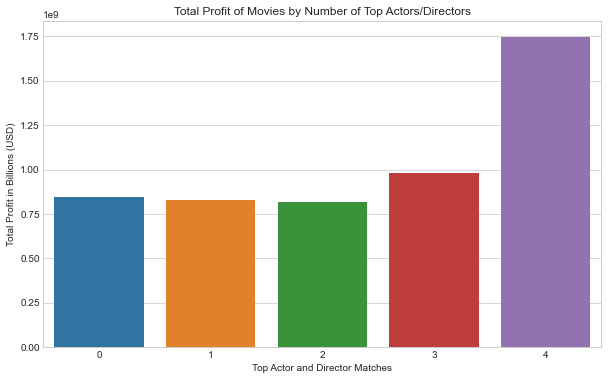

In [58]:
# Set x and y
x_bar = merged_profit_linear_df["director_actor_count"]
y_bar = merged_profit_linear_df["total_profit"]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar graph
sns.barplot(x=x_bar, y=y_bar, ax=ax, ci=None)
ax.set_xlabel("Top Actor and Director Matches")
ax.set_ylabel("Total Profit in Billions (USD)")
ax.set_title("Total Profit of Movies by Number of Top Actors/Directors")


# Display the graph
plt.show()

### Model of Count

We ran a model with this newly created count column. The results were not reliable, with only 7% explained variance and a p value barely below the alpha level, so further manipulation was taken.

In [59]:
#set X and y for new model
X_profit = merged_profit_linear_df[['director_actor_count']]
y_profit = merged_profit_linear_df['total_profit']

#test model
model_profit = sm.OLS(endog=y_profit, exog=sm.add_constant(X_profit))
results_profit = model_profit.fit()
print(results_profit.summary())

                            OLS Regression Results                            
Dep. Variable:           total_profit   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     5.254
Date:                Tue, 09 Jan 2024   Prob (F-statistic):             0.0259
Time:                        14:53:10   Log-Likelihood:                -1135.0
No. Observations:                  55   AIC:                             2274.
Df Residuals:                      53   BIC:                             2278.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8.194e+08 

In [60]:
linear_rainbow(results_profit)

(12.024556440573413, 9.799286781428367e-09)

### Bar Graph of Movies with Top Directors/Actors by Genre

We then visualized a bar graph of the matches grouped by genre. Action/Adventure/Sci-Fi has by far the most top 20 profitable directors and principal actors associated.

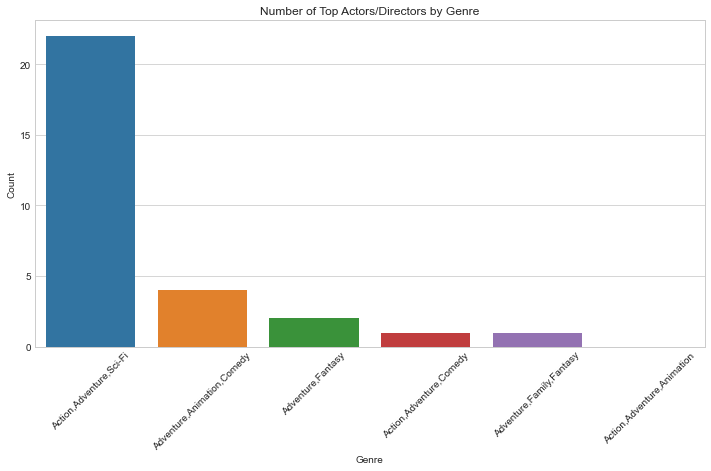

In [61]:
# Group by genres and calculate the sum of total_profit and count of genre_director_actor_count
grouped_genre_count_df = merged_profit_linear_df.groupby('genres').agg({
    'total_profit': 'sum',
    'director_actor_count': 'sum'
}).reset_index()

# Sort the DataFrame by director_actor_count in descending order
sorted_genre_count_df = grouped_genre_count_df.sort_values('director_actor_count', ascending=False)

# Limit to the first 9 rows
limited_genre_count_df = sorted_genre_count_df.head(6)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar graph with limited data
sns.barplot(x='genres', y='director_actor_count', data=limited_genre_count_df, ax=ax, order=limited_genre_count_df['genres'])
ax.set_xlabel("Genre")
ax.set_ylabel("Count")
ax.set_title("Number of Top Actors/Directors by Genre")


# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the graph
plt.show()

### Test the Count Model 

Now grouped by genre. The results account for 89% of variance and are statistically significant overall, but the constant is not. It's also a smaller sample size of 16, so it's not quite as reliable, but suggests that each inclusion of a member of the top 20 directors and principal actors results in a gain of nearly $400 million in net profit. Our linearity test still shows that there may not necessarily be a linear relationship between profit and the number of top actors/directors associated with the project.

In [62]:
#set X and y for new model
X_genre_count = grouped_genre_count_df[['director_actor_count']]
y_genre_count = grouped_genre_count_df['total_profit']

#test model
model_genre_count = sm.OLS(endog=y_genre_count, exog=sm.add_constant(X_genre_count))
results_genre_count = model_genre_count.fit()
print(results_genre_count.summary())

                            OLS Regression Results                            
Dep. Variable:           total_profit   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     66.26
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           1.12e-06
Time:                        14:53:10   Log-Likelihood:                -363.59
No. Observations:                  16   AIC:                             731.2
Df Residuals:                      14   BIC:                             732.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.583e+09 

/Users/Chris/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [63]:
#Test for linearity
linear_rainbow(results_genre_count)

(10.770978056952911, 0.004750705179795836)

### Closed SQL Connection

In [64]:
conn.close()

## Conclusions

The conducted analysis leads to three recommendations for movie production:

* **Focus on Action/Adventure/Sci-Fi.** This seems to be all the rage at the box office right now, as our analysis indicated this was the most profitable genre and involves the most profitable actors/directors. 

* **Certain Actors and Directors are Reliable Money-Makers.** Actors like Chris Evans, as well as directors like the Russo Brothers, seem to frequently strike gold at the box office. It would only make sense to seek them out for projects. 

* **Don't Focus So Much On Budget and Aim for International Release.** While you may think that a higher production budget inevitably results in higher profits, this has been demonstrated to not necessarily be the case, as there have been plenty of flops over the years. Regardless of the budget, the worldwide gross will dictate the amount of profit the movie ultimately generates. 